In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import *
from sklearn.datasets import load_boston
from sklearn.model_selection import GridSearchCV

In [2]:
boston=load_boston()

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

In [4]:
df
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston.target[0:3]

array([24. , 21.6, 34.7])

In [6]:
df["RM"][0:3]

0    6.575
1    6.421
2    7.185
Name: RM, dtype: float64

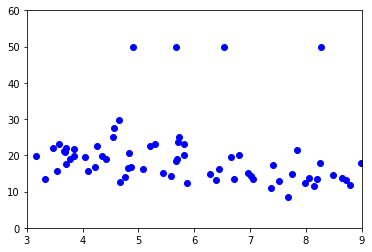

In [7]:
plt.scatter(df['CRIM'],boston.target,color='b')
plt.axis([3,9,0,60])
plt.show()

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression


In [9]:
x=df.drop(['target'],axis=1)
x[0:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
y=df['target'].values.reshape(-1,1)
y[0:5]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2]])

In [11]:
#split dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4433)
print(x_train.shape)
print(y_train.shape)

(404, 13)
(404, 1)


In [42]:
#linear regression

lin_reg=LinearRegression()
MSEs=cross_val_score(lin_reg,x_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_MSE=np.mean(MSEs)
print(mean_MSE)

-23.479533017205462


In [43]:
#ridge linear regression
#L2-norm
#ridge cross validation

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV
alphas=np.logspace(-5,6,200)
ridge= RidgeCV(alphas=alphas,cv=20)
ridge.fit(x_train,y_train)
MSE=metrics.mean_squared_error(y_train,ridge.predict(x_train))

print(MSE)
print(ridge.alpha_)


20.676345639300585
0.2327202478960412


In [60]:
#Lasso regression
#L1-norm
#Lasso cross validation


from sklearn.linear_model import LassoCV
alphas=np.logspace(-13,-10,200)
lasso=LassoCV(alphas=alphas,cv=80)
lasso.fit(x_train,y_train)
MSE=metrics.mean_squared_error(y_test,lasso.predict(x_test))

print(MSE)
print(lasso.alpha_)
print(lasso.coef_)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1295.9152668480037, tolerance: 3.40604487437186
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1792.1902975739667, tolerance: 3.40604487437186
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dua

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101.2123014335439, tolerance: 3.46290893734336
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316.4494151824256, tolerance: 3.46290893734336
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187.32815239049978, tolerance: 3.46290893734336
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increas

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2030.5070763218482, tolerance: 3.4649177343358395
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 438.7718953986532, tolerance: 3.4649177343358395
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1732.8544535380306, tolerance: 3.4649177343358395
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to i

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.61153835238474, tolerance: 3.435149959899751
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373.8215453782732, tolerance: 3.435149959899751
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2421.9888092632573, tolerance: 3.435149959899751
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to incr

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.4157944779181, tolerance: 3.41716773433584
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790.6118154985998, tolerance: 3.41716773433584
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2193.331492184787, tolerance: 3.41716773433584
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase t

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1903.2351478747605, tolerance: 3.4617837443609023
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100.89214541587535, tolerance: 3.4617837443609023
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.48388268238523, tolerance: 3.4617837443609023
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.83191791453646, tolerance: 3.451431749373435
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1527.39030837044, tolerance: 3.451431749373435
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128.9151847405801, tolerance: 3.404310305764412
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increa

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.02941629435736, tolerance: 3.3348079598997504
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2826.466792385657, tolerance: 3.3348079598997504
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.840176016406076, tolerance: 3.3348079598997504
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to in

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 472.73867236875867, tolerance: 3.4661900300751878
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 360.84461901611667, tolerance: 3.4661900300751878
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1388.675217049511, tolerance: 3.4661900300751878
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to i

27.89527759618772
1.3200884008314166e-13
[-8.79157221e-02  3.95843726e-02  1.26971080e-02  1.37282416e+00
 -1.68786884e+01  3.91192996e+00  8.89688896e-03 -1.40185301e+00
  3.13601035e-01 -1.42396878e-02 -9.97509946e-01  9.68043314e-03
 -5.29431846e-01]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1721.6781657658794, tolerance: 3.449988786967417
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1901.0917421307377, tolerance: 3.464014411027569
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.060454016405856, tolerance: 3.464014411027569
  tol, rng, random, positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to inc

In [61]:
#Orthogonal linear regression

from sklearn.linear_model import OrthogonalMatchingPursuit
omp= OrthogonalMatchingPursuit(n_nonzero_coefs=13)
omp.fit(x_train,y_train)
MSE=metrics.mean_squared_error(y_test,omp.predict(x_test))

print(MSE)
print(omp.coef_)
print(omp.intercept_)


27.895277596185327
[-8.79157221e-02  3.95843726e-02  1.26971080e-02  1.37282416e+00
 -1.68786884e+01  3.91192996e+00  8.89688896e-03 -1.40185301e+00
  3.13601035e-01 -1.42396878e-02 -9.97509946e-01  9.68043314e-03
 -5.29431846e-01]
[36.29912]


In [62]:
#Random Sample Consensus

from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(random_state=123456)
ransac.fit(x_train,y_train)
MSE=metrics.mean_squared_error(y_test,ransac.predict(x_test))

print(MSE)
print(ransac.estimator_.coef_)

49.75077160409427
[[-6.58311900e-01  7.58788041e-02  8.74576179e-02  7.76874958e-01
  -6.21964089e+00  4.20867989e+00 -3.77957346e-02 -1.09703378e+00
   2.80051636e-01 -8.28876187e-03 -4.96082005e-01 -1.90480367e-03
  -4.19053026e-01]]


In [63]:
#KernelRidge

from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

paramgrid={'alpha':np.logspace(-3,3,10),'gamma':np.logspace(-3,3,10)}

krrcv=GridSearchCV(
KernelRidge(kernel='rbf'),
paramgrid,
scoring='neg_mean_squared_error',
cv=5,
verbose=True)

krrcv.fit(x_train,y_train)

MSE=metrics.mean_squared_error(y_test,krrcv.predict(x_test))

print(MSE)
print(krrcv.best_score_)
print(krrcv.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


38.14168619742293
-38.392839483739024
{'alpha': 0.021544346900318832, 'gamma': 0.001}


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.7s finished


In [64]:
np.std(y)

9.188011545278203

In [65]:
ys=y_train/np.std(y_train)
yt=y_test/np.std(y_test)
print(y[0:3])
print(ys[0:3])
print(yt[0:3])

[[24. ]
 [21.6]
 [34.7]]
[[2.368472  ]
 [2.33617465]
 [2.49766138]]
[[2.63423595]
 [1.77896454]
 [3.31845308]]


In [66]:
#Gaussian Process Regression

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.gaussian_process import GaussianProcessRegressor
kernels=RBF()*DotProduct()**3+WhiteKernel()

gpr=GaussianProcessRegressor( normalize_y=True)
gpr.fit(x_train,ys)

MSE=metrics.mean_squared_error(yt, gpr.predict(x_test))

#print(gpr.predict(x,return_std=True))
print(gpr.kernel_)
print(gpr.score(x_train,ys))
print(MSE)

1**2 * RBF(length_scale=1)
1.0
0.9971757138393547


In [100]:
#Kernel SVR

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

paramgrid={'C':np.logspace(5,6,4),
          'gamma': np.logspace(-5,-4,4),
          'epsilon': np.logspace(-2,2,10)}

svrcv=model_selection.GridSearchCV(
    SVR(kernel='rbf'),
    paramgrid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1)

svrcv.fit(x_train,y_train)

MSE=metrics.mean_squared_error(y_test, svrcv.predict(x_test))

print(MSE)
print(svrcv.best_score_)
print(svrcv.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 562 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 785 out of 800 | elapsed: 14.7min remaining:   16.9s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed: 14.8min finished
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


15.66724322157431
-15.11805930207351
{'C': 100000.0, 'epsilon': 1.6681005372000592, 'gamma': 1e-05}


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was pas

[9.375143528218995, 9.37218847507114, 9.37320722526946, 9.372892025412895, 9.374458215144552, 9.370056293372116, 9.375204096457372]


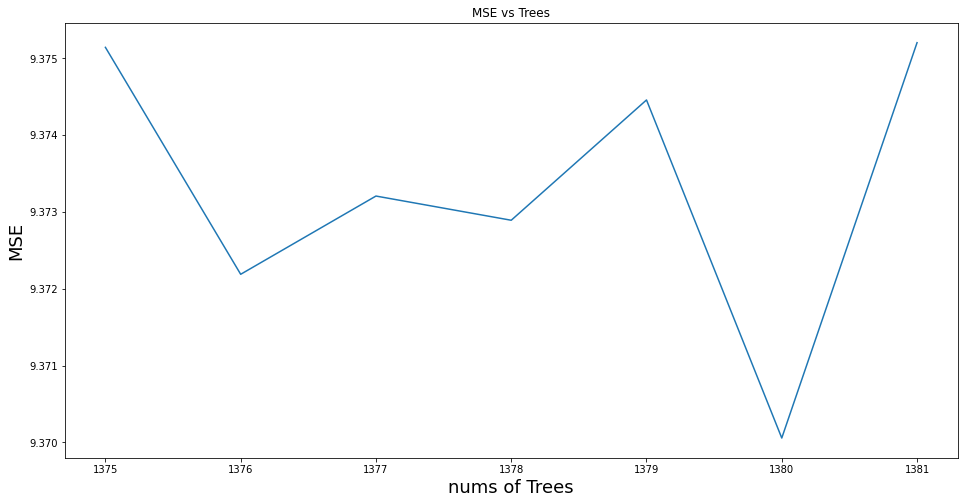

In [91]:
#Random Forest Regression
#check the num of tree vs MSE

from sklearn.ensemble import RandomForestRegressor

MSEp=[]
Trees=[]
for n in range(1375,1382):
    
    rf=RandomForestRegressor(n_estimators=n, random_state=4487, n_jobs=-1)
    rf.fit(x_train,y_train)
    MSE=metrics.mean_squared_error(y_test,rf.predict(x_test))
    MSEp.append(MSE)
    Trees.append(n)

print(MSEp)
plt.figure(figsize=(16,8))
plt.title('MSE vs Trees')
plt.xlabel('nums of Trees',fontsize=18)
plt.ylabel('MSE', fontsize=18)
plt.plot(Trees,MSEp)

plt.show()

In [18]:
#Random Forest Regression

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

paramgrid={'max_depth':np.array([8,9,10,11]),
          'n_estimators':np.array([1375,1380,1385,1390])}

rfcv=GridSearchCV(
RandomForestRegressor(n_estimators=1380,random_state=4487),
paramgrid,
scoring='neg_mean_squared_error',
cv=5,
n_jobs=-1,
verbose=True)

rfcv.fit(x_train,y_train)

MSE=metrics.mean_squared_error(y_test,rfcv.predict(x_test))

print(MSE)
print(rfcv.best_score_)
print(rfcv.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   49.6s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


9.378022071943917
-11.555235548473993
{'max_depth': 10, 'n_estimators': 1375}


In [12]:
#XGBoost Regression
#XGBoost model baseline

xgb_baseline=xgb.XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=5,
                              min_child_weight=1,gamma=0,subsample=0.0,colsample_bytree=0.8,
                             nthread=6,scale_pos_weight=1,seed=27)

In [13]:
#XGBoost Regression
#GridsearchCV
#Find best parameters
#Normally, n_estimators should set 1000+, for the test in here.

parameters = {
    'colsample_bytree':[0.4,0.6,0.8],
    'gamma':[0,0.03,0.1,0.3],
    'min_child_weight':[1.5,6,10],
    'learning_rate':[0.1,0.07],
    'max_depth':[3,5],
    'n_estimators':[100],
    'reg_alpha':[1e-5, 1e-2,  0.75],
    'reg_lambda':[1e-5, 1e-2, 0.45],
    'subsample':[0.6,0.95],
    'scale_pos_weight':[0.6,0.8,1]
    
}

gcv = GridSearchCV(estimator = xgb_baseline, param_grid = parameters, 
                        n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')

gcv.fit(x_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    1.8s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:    2.3s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    4.8s
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:    5.2s
[Parallel(

[Parallel(n_jobs=6)]: Done 9373 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 9510 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 9649 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 9788 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 9929 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 10070 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 10213 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 10356 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 10501 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 10646 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 10793 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 10940 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 11089 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 11238 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 11389 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 11540 tasks      | elapsed:  6.0m

[Parallel(n_jobs=6)]: Done 35900 tasks      | elapsed: 19.2min
[Parallel(n_jobs=6)]: Done 36169 tasks      | elapsed: 19.3min
[Parallel(n_jobs=6)]: Done 36438 tasks      | elapsed: 19.4min
[Parallel(n_jobs=6)]: Done 36709 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done 36980 tasks      | elapsed: 19.8min
[Parallel(n_jobs=6)]: Done 37253 tasks      | elapsed: 19.9min
[Parallel(n_jobs=6)]: Done 37526 tasks      | elapsed: 20.1min
[Parallel(n_jobs=6)]: Done 37801 tasks      | elapsed: 20.2min
[Parallel(n_jobs=6)]: Done 38076 tasks      | elapsed: 20.3min
[Parallel(n_jobs=6)]: Done 38353 tasks      | elapsed: 20.5min
[Parallel(n_jobs=6)]: Done 38630 tasks      | elapsed: 20.7min
[Parallel(n_jobs=6)]: Done 38880 out of 38880 | elapsed: 20.8min finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 100, 'reg_alpha': 0.75, 'reg_lambda': 1e-05, 'scale_pos_weight': 0.6, 'subsample': 0.95}
-9.40312270875952


In [16]:
#XGBoost Regression
#finded the best parameters
#Train

best_model=xgb.XGBRegressor(learning_rate=0.1,n_estimators=100,max_depth=3,
                              min_child_weight=1.5,gamma=0.3,subsample=0.95,colsample_bytree=0.6,
                             reg_alpha=0.75,reg_lambda=1e-05,scale_pos_weight=0.6,seed=42)

best_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.3, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=1e-05, scale_pos_weight=0.6, seed=42,
             subsample=0.95, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [17]:
#Predict

MSE=metrics.mean_squared_error(y_test,best_model.predict(x_test))

print(MSE)

9.152108483338914
